In [259]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [353]:
tkm = pd.read_csv('pressure.csv', sep=",", decimal=".", header=0)

In [330]:
del tkm['Advancing_time']
del tkm['Retracting_time']
del tkm['Load_advancing']
del tkm['Load_retracting']
del tkm['Soft_stop_active']
tkm.head()

,Number_of_measurement,Timestamp,Value
0,1,40,6
1,1,60,6
2,1,80,7
3,1,100,7
4,1,120,6


In [197]:
tkm.Number_of_measurement.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [331]:
Nr_class = [] 
for j in range(len(tkm)): 
    if int(tkm.Number_of_measurement.iloc[j]==1): 
        Nr_class.append(0) 
    elif 1 <int(tkm.Number_of_measurement.iloc[j]) < 14: 
        Nr_class.append(1)
    elif int(tkm.Number_of_measurement.iloc[j]==14): 
        Nr_class.append(2) 
    elif int(tkm.Number_of_measurement.iloc[j]==15): 
        Nr_class.append(3)
tkm['Nr_class'] = Nr_class

In [338]:
Probki = []
probka = 1
last_class = 0
last_measurement = 1

for i in range(1,15+1):
    print(i)
    for j in range(sum(tkm.Number_of_measurement==i)): 
        #jeżeli nr klasy taka sam jak poprzedni:
        if int(tkm.Nr_class[tkm.Number_of_measurement==i].iloc[j]) == last_class and tkm.Number_of_measurement[tkm.Number_of_measurement==i].iloc[j] == last_measurement:
            Probki.append(probka)
        elif int(tkm.Nr_class[tkm.Number_of_measurement==i].iloc[j]) == last_class:
            probka+=1
            Probki.append(probka)
        
        #nowa klasa to zeruj próbki
        elif int(tkm.Nr_class[tkm.Number_of_measurement==i].iloc[j]) != last_class:
            probka=1
            Probki.append(probka)
            
        #zapisz tą klasę jako ostatnią
        last_class = tkm.Nr_class[tkm.Number_of_measurement==i].iloc[j]
        last_measurement = tkm.Number_of_measurement[tkm.Number_of_measurement==i].iloc[j]

1
2
3
a
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [339]:
print(len(Probki))
print(len(tkm))

42621
42621


In [340]:
tkm['Nr_sample'] = Probki
# tkm[tkm.Nr_class==2]
tkm = tkm[['Nr_class', 'Nr_sample', 'Timestamp', 'Value']]
# tkm = tkm[['Nr_class', 'probki', 'Time', 'Sensor_1_value']]
columns = ['Nr_class','Nr_sample','Time', 'Sensor_1_value']
tkm.columns = columns
tkm.head()

,Nr_class,Nr_sample,Time,Sensor_1_value
0,0,1,40,6
1,0,1,60,6
2,0,1,80,7
3,0,1,100,7
4,0,1,120,6


In [341]:
tkm.Nr_sample[tkm.Nr_class==2].head()

34789    1
34790    1
34791    1
34792    1
34793    1
Name: Nr_sample, dtype: int64

In [346]:
tkm.Nr_sample[tkm.Nr_class==1].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [347]:
tkm.to_csv('tkm_processed.csv', index=False)

In [450]:
'''Usuwanie przednich i tylnich zakończeń'''
tkm = pd.read_csv('tkm_processed.csv', sep=",", decimal=".", header=0)

group = tkm.groupby(['Nr_class', 'Nr_sample'])
for name, group in tkm.groupby(['Nr_class', 'Nr_sample']):
    print(name, group)

(0, 1)       Nr_class  Nr_sample   Time  Sensor_1_value
0            0          1     40               6
1            0          1     60               6
2            0          1     80               7
3            0          1    100               7
4            0          1    120               6
5            0          1    140            2468
6            0          1    160            2945
7            0          1    180            3251
8            0          1    200            3459
9            0          1    220            3627
10           0          1    240            3724
11           0          1    261            3627
12           0          1    280            3576
13           0          1    300            3557
14           0          1    320            3557
15           0          1    340            3583
16           0          1    360            3659
17           0          1    380            3678
18           0          1    400            3737
19           

In [451]:
tkm.groupby(['Nr_class', 'Nr_sample']).first()

Time  Sensor_1_value
Nr_class Nr_sample                      
0        1            40               6
1        1            26               5
         2            28            3697
         3            22            3673
         4            21            3683
         5            24            3437
         6            23            3435
         7            20               7
         8            27            3667
         9            31            3435
         10           30            1745
         11           37            3431
         12           23              19
2        1            36            3722
3        1            39            3448

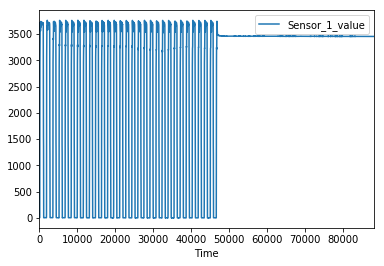

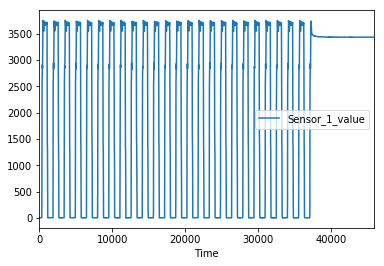

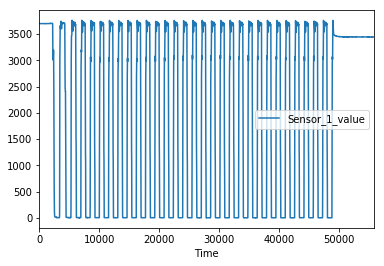

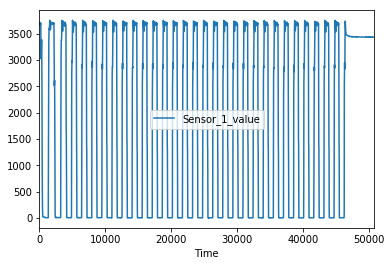

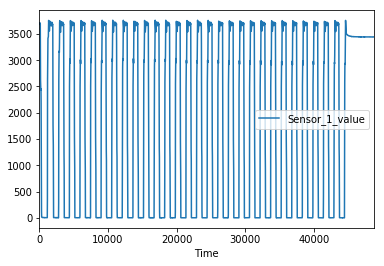

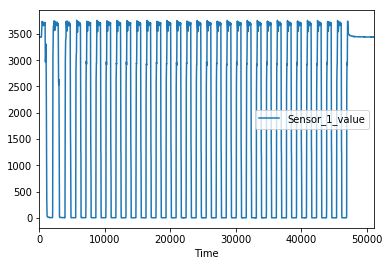

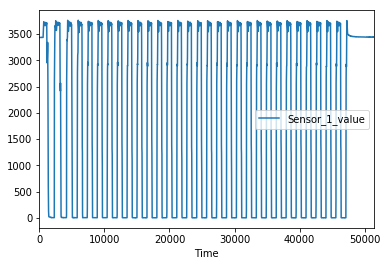

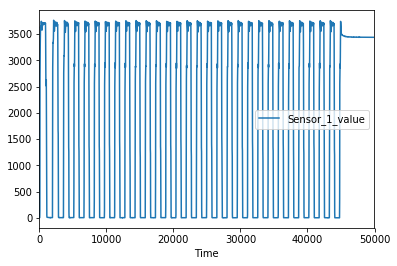

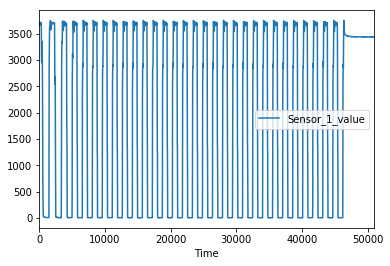

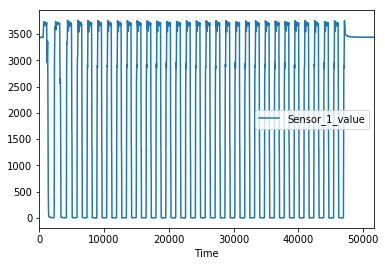

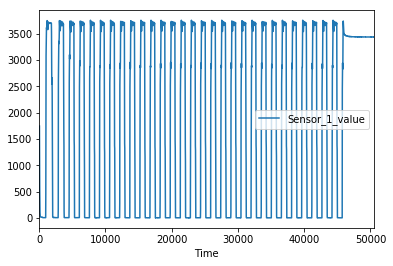

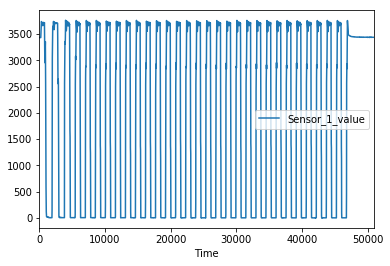

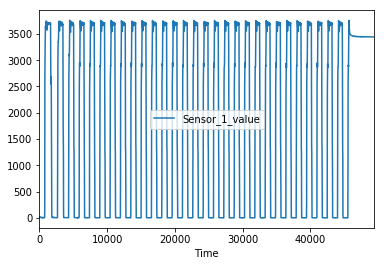

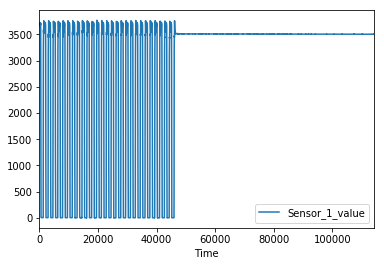

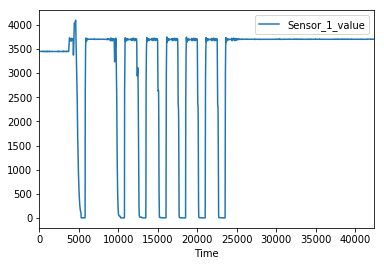

In [393]:
tkm.groupby(['Nr_class', 'Nr_sample']).plot(x='Time',y='Sensor_1_value')
plt.show()

In [130]:
szum = pd.read_csv('szum.csv', sep=",", decimal=".", header=0)
light =  pd.read_csv('jasniutko.csv', sep=",", decimal=".", header=0)
dark =  pd.read_csv('ciemniutko.csv', sep=",", decimal=".", header=0)

In [135]:
dark.head()

,1566466671.6568286,4.327848376770607
0,1.566467e+09,4.506655
1,1.566467e+09,4.134130
2,1.566467e+09,5.225192
3,1.566467e+09,5.546643
4,1.566467e+09,7.236063


<Figure size 1800x576 with 0 Axes>

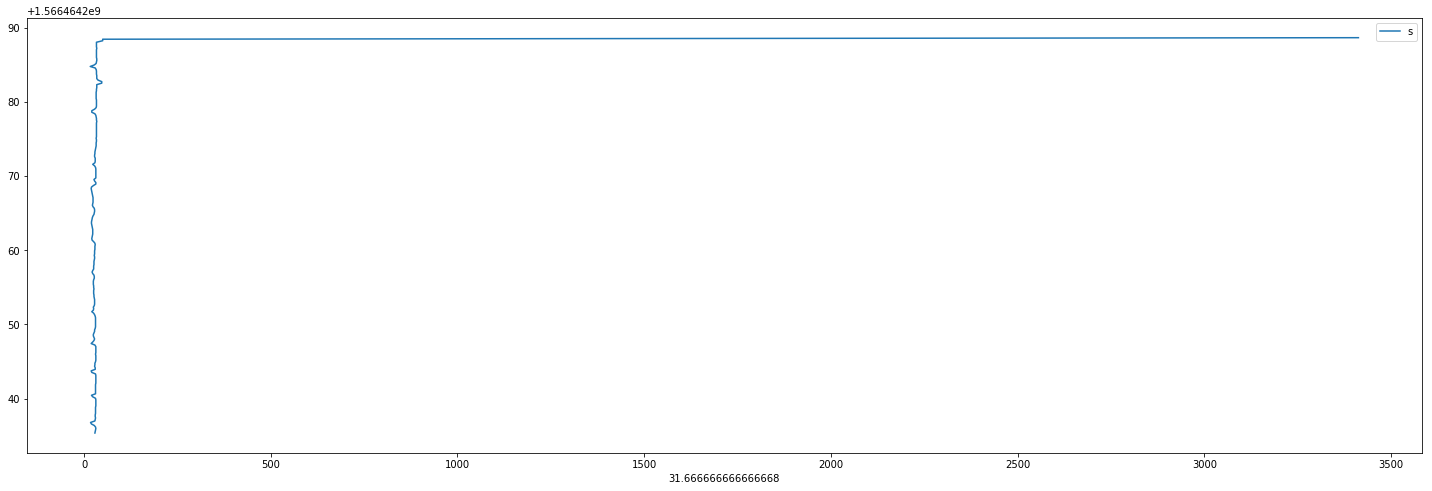

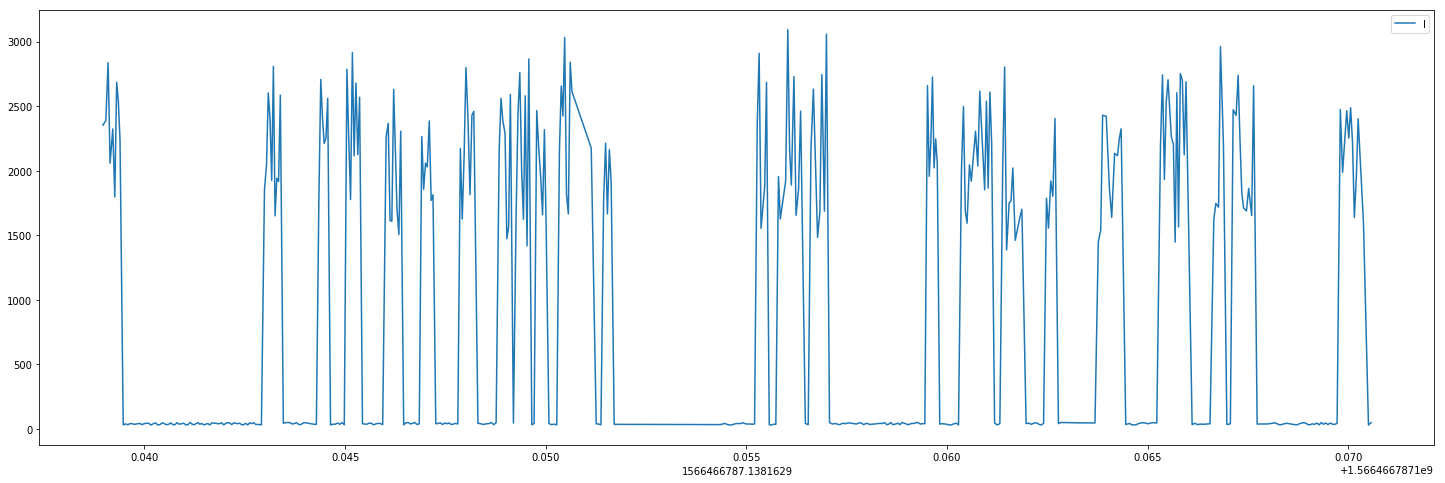

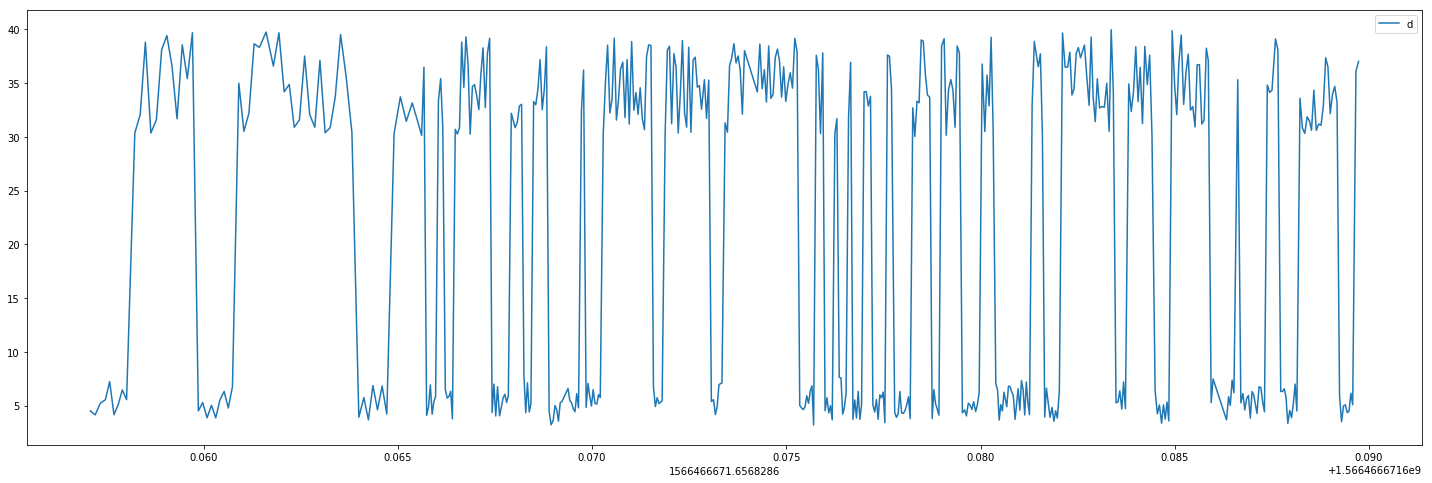

In [140]:
fig=plt.figure(figsize=(25, 8))
szum.plot(y='1566464235.1489534', x='31.666666666666668', figsize=(25, 8))
plt.legend('szum')
light.plot(x='1566466787.1381629', y='1660.2331970091495', figsize=(25, 8))
plt.legend('light')
dark.plot(x='1566466671.6568286', y='4.327848376770607', figsize=(25, 8))
plt.legend('dark')

In [263]:
'''--------------------------------------------------------------------------------------------'''
#ACC_backgroound
acc_back = pd.read_csv('Secondary sensors.csv', sep=",", decimal=".", header=0)
acc_anomaly = pd.read_csv('df_accelerometer_anomaly.csv', sep=",", decimal=".", header=0)
del acc_back['Unnamed: 0']
del acc_anomaly['Unnamed: 0']
acc_back.head()

,measurement,timestamp,value_x,value_y,value_z
0,1,1.565174e+09,3,17,6
1,2,1.565174e+09,4,-9,8
2,3,1.565174e+09,1,-4,1
3,4,1.565174e+09,7,19,4
4,5,1.565174e+09,9,15,11


In [5]:
acc_anomaly.head()

,measurement,timestamp,value_x,value_y,value_z
0,1,1.565176e+09,1,2,4
1,2,1.565176e+09,4,1,8
2,3,1.565176e+09,8,2,3
3,4,1.565176e+09,-1,0,7
4,5,1.565176e+09,-6,7,7


(0, 300)

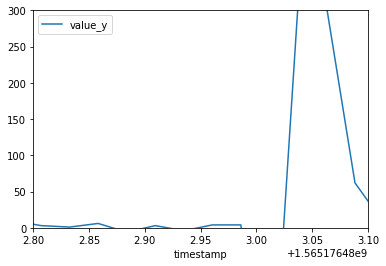

In [480]:
acc_anomaly.plot(x='timestamp', y='value_y')
plt.xlim(82.8+1.5651764e9,83.1+1.5651764e9)
plt.ylim(0,300)

90


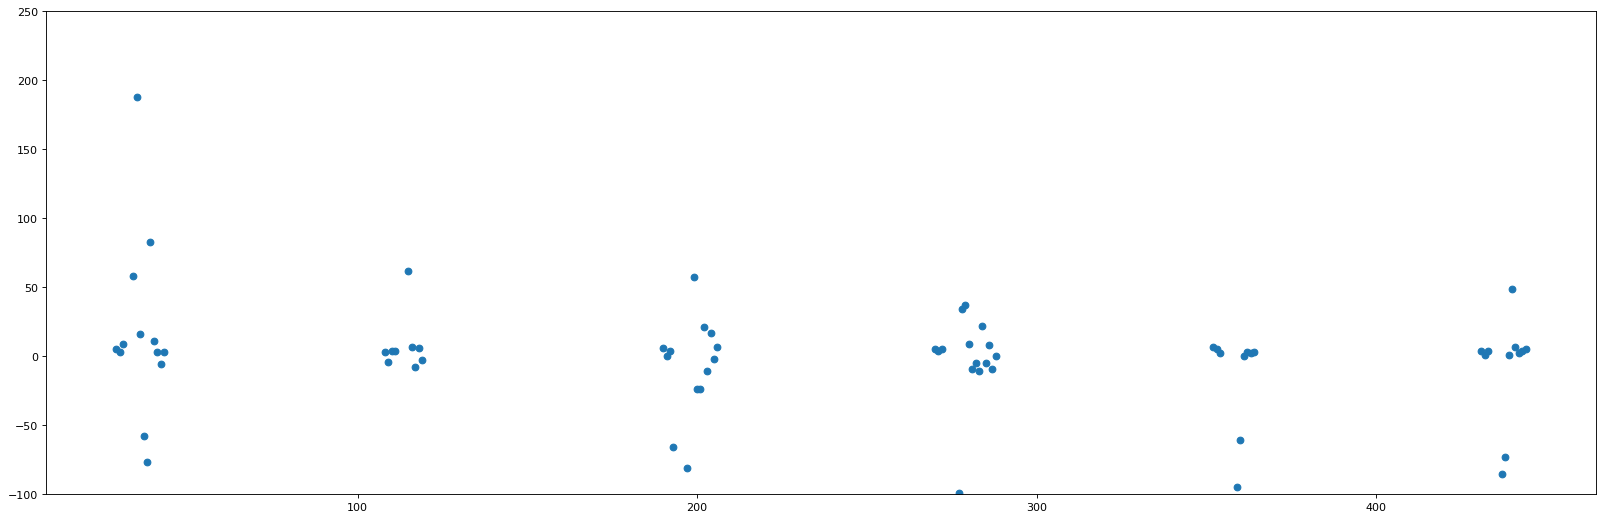

In [264]:
#Podział na sample z minimum 2 pomiarami z anomalii
Nr_sample = []
nr_sample=0
time = []
value_x = []
value_y = []
value_z = []
measure = []
y = []
boola = False #górka

for i in range(1,len(acc_anomaly)):  #500    
    #Nie było anomalii, i jest pierwszy wynik
    if (abs(int(acc_anomaly.value_x[i:i+1])) >= 20 or abs(int(acc_anomaly.value_y[i:i+1])) >= 20 or \
        abs(int(acc_anomaly.value_z[i:i+1])) >= 20) and boola == False:  #pierwszy pik
        value_x.append(int(acc_anomaly.value_x[i-3:i-2]))
        value_y.append(int(acc_anomaly.value_y[i-3:i-2]))
        value_z.append(int(acc_anomaly.value_z[i-3:i-2]))
        time.append(int(acc_anomaly.timestamp[i-3:i-2]))
        measure.append(int(acc_anomaly.measurement[i-3:i-2]))
        
        value_x.append(int(acc_anomaly.value_x[i-2:i-1]))
        value_y.append(int(acc_anomaly.value_y[i-2:i-1]))
        value_z.append(int(acc_anomaly.value_z[i-2:i-1]))
        time.append(int(acc_anomaly.timestamp[i-2:i-1]))
        measure.append(int(acc_anomaly.measurement[i-2:i-1]))
        
        value_x.append(int(acc_anomaly.value_x[i-1:i]))
        value_y.append(int(acc_anomaly.value_y[i-1:i]))
        value_z.append(int(acc_anomaly.value_z[i-1:i]))
        time.append(int(acc_anomaly.timestamp[i-1:i]))
        measure.append(int(acc_anomaly.measurement[i-1:i]))
        
        nr_sample+=1
        Nr_sample.append(nr_sample)
        Nr_sample.append(nr_sample)
        Nr_sample.append(nr_sample)
        Nr_sample.append(nr_sample)
        
        boola = True
        
        value_x.append(int(acc_anomaly.value_x[i:i+1]))
        value_y.append(int(acc_anomaly.value_y[i:i+1]))
        value_z.append(int(acc_anomaly.value_z[i:i+1]))
        time.append(int(acc_anomaly.timestamp[i:i+1]))
        measure.append(int(acc_anomaly.measurement[i:i+1]))
        
    elif (abs(int(acc_anomaly.value_x[i:i+1])) >= 20 or abs(int(acc_anomaly.value_y[i:i+1])) >= 20 or \
        abs(int(acc_anomaly.value_z[i:i+1])) >= 20) and boola == True: 
        value_x.append(int(acc_anomaly.value_x[i:i+1]))
        value_y.append(int(acc_anomaly.value_y[i:i+1]))
        value_z.append(int(acc_anomaly.value_z[i:i+1]))
        time.append(int(acc_anomaly.timestamp[i:i+1]))
        measure.append(int(acc_anomaly.measurement[i:i+1]))        
        Nr_sample.append(nr_sample)       
        
    #Jest anomalia, ale obecny wynik poniżej 20 i jeden z 5 do tyłu też
    elif (abs(int(acc_anomaly.value_x[i:i+1]))<=20 or abs(int(acc_anomaly.value_y[i:i+1]))<= 20 or \
          abs(int(acc_anomaly.value_z[i:i+1]))<=20) and boola==True and  \
    (abs(int(acc_anomaly.value_x[i-4:i-3]))>=20 or \
    abs(int(acc_anomaly.value_x[i-3:i-2])) >=20 or abs(int(acc_anomaly.value_x[i-2:i-1])) >=20 or \
    abs(int(acc_anomaly.value_x[i-1:i])) >=20 or abs(int(acc_anomaly.value_x[i+1:i+2])) >=20 or \
    abs(int(acc_anomaly.value_x[i+2:i+3])) >=20 or abs(int(acc_anomaly.value_x[i+3:i+4])) >=20 or \
    abs(int(acc_anomaly.value_y[i-4:i-3])) >=20 or \
    abs(int(acc_anomaly.value_y[i-3:i-2])) >=20 or abs(int(acc_anomaly.value_y[i-2:i-1])) >=20 or \
    abs(int(acc_anomaly.value_y[i-1:i])) >=20 or abs(int(acc_anomaly.value_y[i+1:i+2])) >=20 or \
    abs(int(acc_anomaly.value_y[i+2:i+3])) >=20 or abs(int(acc_anomaly.value_y[i+3:i+4])) >=20 or \
    abs(int(acc_anomaly.value_z[i-4:i-3])) >=20 or \
    abs(int(acc_anomaly.value_z[i-3:i-2])) >=20 or abs(int(acc_anomaly.value_z[i-2:i-1])) >=20 or \
    abs(int(acc_anomaly.value_z[i-1:i])) >=20 or abs(int(acc_anomaly.value_z[i+1:i+2])) >=20 or \
    abs(int(acc_anomaly.value_z[i+2:i+3])) >=20 or abs(int(acc_anomaly.value_z[i+3:i+4])) >=20):
        Nr_sample.append(nr_sample)
        value_x.append(int(acc_anomaly.value_x[i:i+1]))
        value_y.append(int(acc_anomaly.value_y[i:i+1]))
        value_z.append(int(acc_anomaly.value_z[i:i+1]))
        time.append(int(acc_anomaly.timestamp[i:i+1]))
        measure.append(int(acc_anomaly.measurement[i:i+1]))

    #Była anomalia
    elif (abs(int(acc_anomaly.value_x[i:i+1])) <= 20 or abs(int(acc_anomaly.value_y[i:i+1])) <= 20 or \
     abs(int(acc_anomaly.value_z[i:i+1])) <= 20) and boola == True: 
        boola = False                                           
        
    else:
        pass
       
fig=plt.figure(figsize=(25, 8), dpi= 80)
plt.scatter(measure, value_y)
plt.ylim(-100,250)
print(len(measure))

In [265]:
print(len(measure))

90


In [266]:
print(len(Nr_sample))

90


In [267]:
columns = ['Nr_class','Nr_sample','Time', 'Sensor_1_value', 'Sensor_2_value', 'Sensor_3_value']
acc_anomaly_processed = pd.DataFrame(columns=columns)
acc_anomaly_processed['Nr_class'] = [1 for i in range(len(Nr_sample))] #klasa anomalii

acc_anomaly_processed['Nr_sample'] = Nr_sample
acc_anomaly_processed['Time'] = time
acc_anomaly_processed['Sensor_1_value'] = value_x
acc_anomaly_processed['Sensor_2_value'] = value_y
acc_anomaly_processed['Sensor_3_value'] = value_z

In [187]:
acc_anomaly_processed.head()

,Nr_class,Nr_sample,Time,Sensor_1_value,Sensor_2_value,Sensor_3_value
0,1,1,1565176480,-1,10,8
1,1,1,1565176480,-2,5,6
2,1,1,1565176480,-2,3,8
3,1,1,1565176480,-3,9,1
4,1,1,1565176480,415,438,-9


In [268]:
acc_anomaly_processed[acc_anomaly_processed['Nr_sample']==1].head(30)

,Nr_class,Nr_sample,Time,Sensor_1_value,Sensor_2_value,Sensor_3_value
0,1,1,1565176480,-2,5,6
1,1,1,1565176480,-2,3,8
2,1,1,1565176480,-3,9,1
3,1,1,1565176480,415,438,-9
4,1,1,1565176480,-666,-475,61
5,1,1,1565176481,58,58,442
6,1,1,1565176481,66,188,62
7,1,1,1565176481,8,16,21
8,1,1,1565176481,-8,-58,7
9,1,1,1565176481,-24,-77,16


In [55]:
acc_anomaly = pd.read_csv('acc_anomaly_processed.csv', sep=",", decimal=".", header=0)
acc_anomaly.head()

,Nr_class,Nr_sample,Time,Sensor_1_value,Sensor_2_value,Sensor_3_value
0,1,1,1565176480,415,438,-9
1,1,1,1565176480,-666,-475,61
2,1,1,1565176481,58,58,442
3,1,1,1565176481,66,188,62
4,1,1,1565176481,8,16,21


In [236]:
acc_back.head()

,measurement,timestamp,value_x,value_y,value_z
0,1,1.565174e+09,3,17,6
1,2,1.565174e+09,4,-9,8
2,3,1.565174e+09,1,-4,1
3,4,1.565174e+09,7,19,4
4,5,1.565174e+09,9,15,11


In [269]:
Nr_class = [0 for i in range(len(acc_back))] #klasa background
acc_back['Nr_class'] = Nr_class
acc_back['Nr_sample'] = [1 for i in range(len(acc_back))]
acc_back.head()
acc_back = acc_back[['Nr_class', 'Nr_sample', 'timestamp', 'value_x', 'value_y', 'value_z']]
columns = ['Nr_class','Nr_sample','Time', 'Sensor_1_value', 'Sensor_2_value', 'Sensor_3_value']
acc_back.columns = columns
acc_back.head()

,Nr_class,Nr_sample,Time,Sensor_1_value,Sensor_2_value,Sensor_3_value
0,0,1,1.565174e+09,3,17,6
1,0,1,1.565174e+09,4,-9,8
2,0,1,1.565174e+09,1,-4,1
3,0,1,1.565174e+09,7,19,4
4,0,1,1.565174e+09,9,15,11


In [270]:
frames = [acc_back, acc_anomaly_processed]
result = pd.concat(frames)
result.head()

,Nr_class,Nr_sample,Time,Sensor_1_value,Sensor_2_value,Sensor_3_value
0,0,1,1.565174e+09,3,17,6
1,0,1,1.565174e+09,4,-9,8
2,0,1,1.565174e+09,1,-4,1
3,0,1,1.565174e+09,7,19,4
4,0,1,1.565174e+09,9,15,11


In [271]:
result.to_csv("accelerometer_processed.csv", index=False)

In [258]:
result[(result['Nr_sample']==3)&(result['Nr_class']==1)].head(40)
#               acc_anomaly_processed[acc_anomaly_processed['Nr_sample']==1].head(30)

,Nr_class,Nr_sample,Time,Sensor_1_value,Sensor_2_value,Sensor_3_value
22,1,3,1.565176e+09,-1,6,4
23,1,3,1.565176e+09,5,0,8
24,1,3,1.565176e+09,6,4,2
25,1,3,1.565176e+09,-45,-66,557
26,1,3,1.565176e+09,23,-193,10
27,1,3,1.565176e+09,22,57,2
28,1,3,1.565176e+09,-10,-24,11
29,1,3,1.565176e+09,6,-24,9
30,1,3,1.565176e+09,9,21,7
31,1,3,1.565176e+09,1,-11,3
